In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image
import pickle

In [2]:
path = 'results/LE_LED_cifer5x2/'

## load data

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
print(len(X_train))
print(len(X_test))
print(X_train.shape)

50000
10000
(50000, 32, 32, 3)


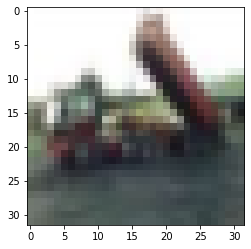

In [5]:
imgplot = plt.imshow(X_train[2])
plt.show()

## preprocessing/F.E.

## set parameter

In [6]:
n_model = 1
n_bs = 2*n_model
epochs = 50
batch_size = 64

# imageshuffle

In [7]:
train_data = pd.DataFrame({'x':[*X_train],'y':[*Y_train]})
test_data = pd.DataFrame({'x':[*X_test],'y':[*Y_test]})
data = [train_data,test_data]

In [8]:
from moudule.BlockScramble import BlockScramble

In [9]:
for d in data:
    d['nor_x'] = d['x'].apply(lambda x:x/255)
    d['cate_y']=[*tf.keras.utils.to_categorical(d['y'])]

In [10]:
bs=[]
for i in range(n_bs):
    bs.append(BlockScramble([4, 4, 3]))
    bs[i].save(path+'key/key'+str(i)+'.pkl')
for d in data:
    for i in range(n_bs):
        d['bs'+str(i)+'_x'] = [*bs[i].Scramble(np.array(list(d['nor_x'])))]

In [11]:
for d in data:
    for i in range(n_bs):
        for j in range(n_bs):
            d['bs'+str(i)+'_d'+str(j)] = [*bs[j].Decramble(np.array(list(d['bs'+str(i)+'_x'])))]

In [12]:
data[0]

,x,y,nor_x,cate_y,bs0_x,bs1_x,bs0_d0,bs0_d1,bs1_d0,bs1_d1
0,"[[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...",[6],"[[[0.23137254901960785, 0.24313725490196078, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[[[0.8156863, 0.53333336, 0.10980392], [0.8784...","[[[0.0627451, 0.6313726, 0.29411766], [0.93725...","[[[0.23137255, 0.24313726, 0.24705882], [0.168...","[[[0.89411765, 0.99607843, 0.0], [0.8, 0.02745...","[[[0.45490196, 0.2509804, 0.79607844], [0.7686...","[[[0.23137255, 0.24313726, 0.24705882], [0.168..."
1,"[[[154, 177, 187], [126, 137, 136], [105, 104,...",[9],"[[[0.6039215686274509, 0.6941176470588235, 0.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.4117647, 0.27058825, 0.5803922], [0.40784...","[[[0.5921569, 0.27450982, 0.93333334], [0.1058...","[[[0.6039216, 0.69411767, 0.73333335], [0.4941...","[[[0.44313726, 0.4, 0.59607846], [0.5176471, 0...","[[[0.17254902, 0.09803922, 0.62352943], [0.396...","[[[0.6039216, 0.69411767, 0.73333335], [0.4941..."
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",[9],"[[[1.0, 1.0, 1.0], [0.9921568627450981, 0.9921...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.12156863, 0.9411765, 0.9411765], [0.05098...","[[[1.0, 0.9490196, 0.99215686], [1.0, 0.0, 0.9...","[[[1.0, 1.0, 1.0], [0.99215686, 0.99215686, 0....","[[[0.007843138, 0.0, 0.99215686], [0.0, 1.0, 0...","[[[0.003921569, 0.18431373, 0.0], [0.0, 0.8156...","[[[1.0, 1.0, 1.0], [0.99215686, 0.99215686, 0...."
3,"[[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...",[4],"[[[0.10980392156862745, 0.09803921568627451, 0...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.38039216, 0.16862746, 0.18039216], [0.890...","[[[0.13333334, 0.92941177, 0.45882353], [0.603...","[[[0.10980392, 0.09803922, 0.039215688], [0.14...","[[[0.6039216, 0.87058824, 0.13725491], [0.8078...","[[[0.3019608, 0.63529414, 0.827451], [0.827451...","[[[0.10980392, 0.09803922, 0.039215688], [0.14..."
4,"[[[170, 180, 198], [168, 178, 196], [177, 185,...",[1],"[[[0.6666666666666666, 0.7058823529411765, 0.7...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.67058825, 0.4117647, 0.45490196], [0.4745...","[[[0.6666667, 0.8666667, 0.47058824], [0.27450...","[[[0.6666667, 0.7058824, 0.7764706], [0.658823...","[[[0.96862745, 0.34117648, 0.4745098], [0.4549...","[[[0.56078434, 0.47843137, 0.2901961], [0.5215...","[[[0.6666667, 0.7058824, 0.7764706], [0.658823..."
...,...,...,...,...,...,...,...,...,...,...
49995,"[[[145, 161, 194], [151, 166, 199], [156, 171,...",[2],"[[[0.5686274509803921, 0.6313725490196078, 0.7...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.7921569, 0.5803922, 0.64705884], [0.16862...","[[[0.6784314, 0.9764706, 0.5921569], [0.070588...","[[[0.5686275, 0.6313726, 0.7607843], [0.592156...","[[[0.34509805, 0.32156864, 0.79607844], [0.333...","[[[0.30980393, 0.5411765, 0.3372549], [0.30588...","[[[0.5686275, 0.6313726, 0.7607843], [0.592156..."
49996,"[[[255, 245, 132], [254, 247, 134], [255, 249,...",[6],"[[[1.0, 0.9607843137254902, 0.5176470588235295...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[[[0.30980393, 0.63529414, 0.8784314], [0.4745...","[[[0.972549, 0.9098039, 0.80784315], [0.329411...","[[[1.0, 0.9607843, 0.5176471], [0.99607843, 0....","[[[0.12941177, 0.02745098, 0.4745098], [0.0, 0...","[[[0.39607844, 0.12156863, 0.043137256], [0.0,...","[[[1.0, 0.9607843, 0.5176471], [0.99607843, 0...."
49997,"[[[35, 178, 235], [40, 176, 239], [42, 176, 24...",[9],"[[[0.13725490196078433, 0.6980392156862745, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.79607844, 0.64705884, 0.83137256], [0.062...","[[[0.8117647, 0.12156863, 0.21960784], [0.1686...","[[[0.13725491, 0.69803923, 0.92156863], [0.156...","[[[0.78039217, 0.25490198, 0.9411765], [0.7058...","[[[0.56078434, 0.48235294, 0.28627452], [0.235...","[[[0.13725491, 0.69803923, 0.92156863], [0.156..."
49998,"[[[189, 211, 240], [186, 208, 236], [185, 207,...",[1],"[[[0.7411764705882353, 0.827450

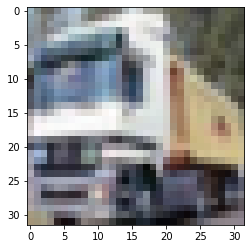

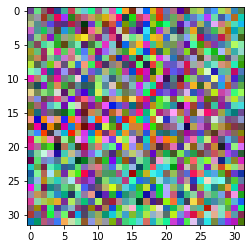

In [13]:
plt.imshow(data[0]['x'][i])
plt.show()
plt.imshow(data[0]['bs0_x'][i])
plt.show()

## Training

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Input,\
                                    Lambda,MaxPooling2D, GlobalAveragePooling2D,\
                                    Add, Concatenate,BatchNormalization
from tensorflow.keras.models import Model

from moudule.padding import PaddingReplicate2D
from moudule.pixelshuffle import PixelShuffle
from moudule.pixelshuffle import PixelShuffle_calc, PixelShuffle_shape

from keras.metrics import categorical_accuracy
from tensorflow.keras.callbacks import CSVLogger

In [15]:
def resnet1(input_shape, nb_classes=10):
    p1 = PaddingReplicate2D((1,1))
    inp = Input(shape=input_shape)
    x = inp

    # block0 ####################################################
    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (4,4), padding='valid', strides=(4,4), kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48
    
    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48

    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48

    x = BatchNormalization() (x)
    x = Conv2D( 4*4*32, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = PixelShuffle( x, 4 )
    # 32x32x32
    
    # block1 ####################################################
    f = 32
    fs = 16
    for i in range(2):
        f0 = f
        f = f+fs
        r = x[:]
        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))
        
        r = Dropout(0.25) (r)
        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0)) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)
        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]

        x = Add() ([x,r0])
        x = Concatenate(axis=-1) ([x,r1])
    # 32x32x64
    
    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 16x16x64
    # block2 ####################################################
    f = 64
    fs = 32
    for i in range(2):
        f0 = f
        f = f+fs
        r = x

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = Dropout(0.25) (r)

        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0) ) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)

        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]
        x = Add() ( [x,r0] )
        x = Concatenate(axis=-1) ([x,r1])

        f0 = f
    # 16x16x128

    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 8x8x128

    # block3 ####################################################
    f = 128
    fs = 64
    for i in range(2):
        f0 = f
        f = f+fs
        r = x

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = Dropout(0.25) (r)

        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0) ) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)

        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]
        x = Add() ( [x,r0] )
        x = Concatenate(axis=-1) ([x,r1])

        f0 = f
    # 8x8x256

    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 4x4x256

    # block4 ####################################################
    x = Dropout(0.5) (x)
    x = Conv2D( 512, (1,1), padding='valid', kernel_initializer='he_normal', activation='relu' ) (x)

    x = Dropout(0.5) (x)
    x = Conv2D( nb_classes, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = GlobalAveragePooling2D() (x)
    x = Activation('softmax') (x)

    return Model(inputs=inp, outputs=x)

In [16]:
model =[]
for i in  range(n_model):
    model.append(resnet1(input_shape=[32,32,3], nb_classes=10))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model[i].summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 3)   12          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 48)     2352        ['batch_normalization[0][0]']    
                                                                                                  
 activation (Activation)        (None, 8, 8, 48)     0           ['conv2d[0][0]']             

 rmalization)                                                    ]']                              
                                                                                                  
 activation_5 (Activation)      (None, 32, 32, 48)   0           ['batch_normalization_6[0][0]']  
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 64)   27712       ['padding_replicate2d[2][0]']    
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 32, 32, 64)   0           ['batch_normalization_7[0][0]']  
          

                                                                                                  
 tf.__operators__.getitem_9 (Sl  (None, 16, 16, 32)  0           ['dropout_3[0][0]']              
 icingOpLambda)                                                                                   
                                                                                                  
 concatenate_3 (Concatenate)    (None, 16, 16, 128)  0           ['add_3[0][0]',                  
                                                                  'tf.__operators__.getitem_9[0][0
                                                                 ]']                              
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 128)   0           ['concatenate_3[0][0]']          
                                                                                                  
 batch_nor

 activation_15 (Activation)     (None, 10)           0           ['global_average_pooling2d[0][0]'
                                                                 ]                                
                                                                                                  
Total params: 2,256,902
Trainable params: 2,253,920
Non-trainable params: 2,982
__________________________________________________________________________________________________


In [17]:
train_y =np.array([[*a]for a in data[0]['cate_y']])
test_y =np.array([[*a]for a in data[1]['cate_y']])

Epoch 1/50
782/782 [==============================] - 131s 153ms/step - loss: 1.6856 - accuracy: 0.3669 - val_loss: 1.5042 - val_accuracy: 0.4010
Epoch 2/50
782/782 [==============================] - 126s 161ms/step - loss: 1.1502 - accuracy: 0.5298 - val_loss: 1.3732 - val_accuracy: 0.4991
Epoch 3/50
782/782 [==============================] - 128s 163ms/step - loss: 0.9837 - accuracy: 0.6070 - val_loss: 2.3376 - val_accuracy: 0.4154
Epoch 4/50
782/782 [==============================] - 130s 166ms/step - loss: 0.8889 - accuracy: 0.6512 - val_loss: 1.1291 - val_accuracy: 0.5598
Epoch 5/50
782/782 [==============================] - 130s 166ms/step - loss: 0.8105 - accuracy: 0.6833 - val_loss: 0.9925 - val_accuracy: 0.6091
Epoch 6/50
782/782 [==============================] - 130s 166ms/step - loss: 0.7462 - accuracy: 0.7112 - val_loss: 0.9263 - val_accuracy: 0.6491
Epoch 7/50
782/782 [==============================] - 129s 165ms/step - loss: 0.6966 - accuracy: 0.7304 - val_loss: 0.8600 -

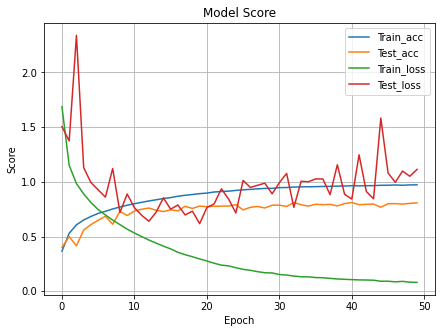

In [18]:
for i in  range(n_model):
    csv_logger = CSVLogger(path+'log/log'+str(i)+'.csv', append=True, separator=';')

    data[0]['train_x'+str(i)] = data[0].apply(lambda row: row['bs'+str(i*2)+'_x'] if row['y']<5 else row['bs'+str(i*2+1)+'_x'], axis=1)
    data[1]['test_x'+str(i)] = data[1].apply(lambda row: row['bs'+str(i*2)+'_x'] if row['y']<5 else row['bs'+str(i*2+1)+'_x'], axis=1) 
    train_x =np.array([[*a]for a in data[0]['train_x'+str(i)]])
    test_x =np.array([[*a]for a in data[1]['test_x'+str(i)]])

    his = model[i].fit(train_x, 
                train_y, 
                epochs=epochs, 
                batch_size=batch_size, 
                verbose=1,
                validation_data=(test_x, test_y),
                callbacks=[csv_logger]
                )
    
    model[i].save(path+'model/model'+str(i)+'.h5')
    with open(path+'his/his'+str(i)+'.pkl', 'wb') as fp:
        pickle.dump(his.history, fp)
        
    fig, ax = plt.subplots(figsize=(7, 5), sharex=True)
    plt.plot(his.history["accuracy"])
    plt.plot(his.history["val_accuracy"])
    plt.plot(his.history["loss"])
    plt.plot(his.history['val_loss'])
    plt.title("Model Score")
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    # ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
    plt.legend(["Train_acc", "Test_acc","Train_loss", "Test_loss"], loc="upper right")
    plt.grid()
    plt.savefig(path+"loss/loss"+str(i)+".png",dpi=1000)
    plt.show()

In [19]:
result = pd.DataFrame({"True_value":data[1]['y']})

In [23]:
for i in range(n_model):
    test_x =np.array([[*a]for a in data[1]['test_x'+str(i)]])
    pred_y = model[i].predict( test_x )
    result['model'+str(i)] = [*pred_y]
    acc = categorical_accuracy( test_y, pred_y )
    print(np.mean(acc))

0.8076


In [24]:
result.to_pickle(path+'pre_test_result.pkl')

In [25]:
result

,True_value,model0
0,[3],"[6.34105e-18, 2.2333322e-20, 1.4257404e-21, 1...."
1,[8],"[0.0, 0.0, 0.0, 0.0, 0.0, 7.1030896e-29, 1.085..."
2,[8],"[3.0523286e-32, 8.2006314e-35, 1.2954186e-32, ..."
3,[0],"[0.9999794, 1.6109828e-07, 1.957895e-05, 3.790..."
4,[6],"[0.0, 0.0, 0.0, 0.0, 0.0, 8.5799716e-20, 1.0, ..."
...,...,...
9995,[8],"[4.793715e-19, 7.231365e-25, 4.955564e-22, 1.1..."
9996,[3],"[2.400785e-17, 4.814662e-16, 2.952321e-11, 0.9..."
9997,[5],"[6.411255e-30, 2.773215e-24, 4.5638015e-19, 1...."
9998,[1],"[0.0030123605, 0.99005765, 9.821884e-06, 0.002..."


In [26]:
temp = data[1].apply(lambda row: row['bs'+str(i*2)+'_x'] if row['y']>=5 else row['bs'+str(i*2+1)+'_x'], axis=1) 
temp = np.array([[*a]for a in temp])
pred_y = model[i].predict( temp )

In [27]:
acc = categorical_accuracy( test_y, pred_y )
print(np.mean(acc))

0.0028


In [28]:
temp = data[1].apply(lambda row: row['bs'+str(i*2)+'_x'] if row['y']<5 else row['bs'+str(i*2+1)+'_x'], axis=1) 
temp = np.array([[*a]for a in temp])
pred_y = model[i].predict( temp )

In [29]:
acc = categorical_accuracy( test_y, pred_y )
print(np.mean(acc))

0.8076
